# Final assembly construction according to contact map

## 1. generate fasta file

In [8]:
cd /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp

In [2]:
ls

Chr1.txt  Chr3.txt  Chr5.txt  Chr7.txt	Chr9.txt
Chr2.txt  Chr4.txt  Chr6.txt  Chr8.txt


In [14]:
python << EOF

index = 0

while index < 9:

    f = open('Chr' + str(index + 1) + '.txt','r')
    f1 = open('group' + str(index) + '.ordering','w')

    for line in f:
        item = line.strip()
        strand = item[0]
        id = item.split(strand)[1]
        if strand == '+':
            f1.write(id + '\t1\t.\t.\n')
        else:
            f1.write(id + '\t0\t.\t.\n')

    f.close()
    f1.close()

    index = index + 1


EOF

In [15]:
ll

total 840
-rw-rw-r--. 1 hraczw powerplant   394 Sep  9 10:25 Chr1.txt
-rw-rw-r--. 1 hraczw powerplant   670 Sep  9 10:25 Chr2.txt
-rw-rw-r--. 1 hraczw powerplant   533 Sep  9 10:25 Chr3.txt
-rw-rw-r--. 1 hraczw powerplant   537 Sep  9 10:25 Chr4.txt
-rw-rw-r--. 1 hraczw powerplant   712 Sep  9 10:25 Chr5.txt
-rw-rw-r--. 1 hraczw powerplant   243 Sep  9 10:26 Chr6.txt
-rw-rw-r--. 1 hraczw powerplant   598 Sep  9 10:26 Chr7.txt
-rw-rw-r--. 1 hraczw powerplant   353 Sep  9 10:26 Chr8.txt
-rw-rw-r--. 1 hraczw powerplant   312 Sep  9 10:26 Chr9.txt
-rw-rw-r--. 1 hraczw powerplant  7100 Sep  9 10:19 CreateScaffoldedFasta.pl
-rw-rw-r--. 1 hraczw powerplant     0 Sep  9 10:23 gillenia_9chrs_official.fasta
-rw-rw-r--. 1 hraczw powerplant   504 Sep  9 10:27 group0.ordering
-rw-rw-r--. 1 hraczw powerplant   850 Sep  9 10:27 group1.ordering
-rw-rw-r--. 1 hraczw powerplant   678 Sep  9 10:27 group2.ordering
-rw-rw-r--. 1 hraczw powerplant   687 Sep  9 10:27 group3.ordering
-rw-rw-r--. 1 hraczw powe

In [7]:
ln -s /workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta

In [16]:
perl CreateScaffoldedFasta.pl scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta \
/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp \
/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp \
gillenia_9chrs_official.fasta

Wed Sep  9 10:27:31 2020: CreateScaffoldedFasta.pl with input fasta = scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta, OUTPUT_DIR = /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp
Wed Sep  9 10:27:31 2020: Found 9 ordering files ('group*.ordering' in /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/).
Wed Sep  9 10:27:31 2020: Reading in sequences from assembly file scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta
Wed Sep  9 10:27:33 2020: Found 1524 contigs/scaffolds in assembly.
Wed Sep  9 10:27:33 2020: Creating a scaffold from file /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/group0.ordering...	length = 46305054
Wed Sep  9 10:27:34 2020: Creating a scaffold from file /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/group1.ordering...	length = 32680979
Wed Sep  9 10:27:34 2020: Creating a scaffold from file /workspace/hraczw/github/GA/Gillenia_genome/014.chr/

In [17]:
ls 

Chr1.txt
Chr2.txt
Chr3.txt
Chr4.txt
Chr5.txt
Chr6.txt
Chr7.txt
Chr8.txt
Chr9.txt
CreateScaffoldedFasta.pl
gillenia_9chrs_official.fasta
group0.ordering
group1.ordering
group2.ordering
group3.ordering
group4.ordering
group5.ordering
group6.ordering
group7.ordering
group8.ordering
scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta
unanchoredIDs.txt


## 2. BUSCO

In [18]:
source /workspace/hraczw/scriptomics/AssemblyBuscoStatsModules.sh

In [ ]:
bsub -J BUSCO -n 10 -m aklppb38 -o busco.out -e busco.err "run_BUSCO.py -i gillenia_9chrs_official.fasta -l /workspace/hraczw/scriptomics/BUSCO/embryophyta_odb10 -f -c 10 -o gillenia_9chr_BUSCO -t gillenia_9chr_tmp -m genome"

## 4. renaming IDs

In [4]:
CHR=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/gillenia_9chrs_official.fasta

In [5]:
grep ">" $CHR

>group0__22_contigs__length_46305054
>group1__36_contigs__length_32680979
>group2__29_contigs__length_27719576
>group3__30_contigs__length_33455105
>group4__39_contigs__length_29393857
>group5__13_contigs__length_26610424
>group6__33_contigs__length_30586256
>group7__19_contigs__length_23036381
>group8__17_contigs__length_22301293


In [ ]:
python << EOF

f = open('gillenia_9chrs_official.fasta','r')
f1 = open('gillenia_9chrs_official.renamed.fasta','w')

index = 1
for line in f:
	if '>' in line:
		f1.write('>Chr0' + str(index) + '\n')
		index = index + 1
	else:
		f1.write(line)

f.close()
f1.close()


EOF

In [6]:
CHR_RENAMED=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/gillenia_9chrs_official.renamed.fasta

## 3. synteny

### 3.1 apple

In [1]:
GENOME_PATH=/output/genomic/plant/Gillenia/trifoliata/Synteny
APPLE_ASSEMBLY=HFTH1.all.chr.fa
PEAR_ASSEMBLY=PyrusCommunis_BartlettDHv2.0.fasta
PEACH_ASSEMBLY=Prunus_persica_v2.0.a1_scaffolds.fasta
RASPBERRY_ASSEMBLY=/output/genomic/plant/Rubus/occidentalis/Genome/Rubus_occidentalis_Braspberry_v3/Rubus_occ_V3_10-12-17.fasta.gz

In [2]:
CHR=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/gillenia_9chrs_official.fasta

In [21]:
mkdir synteny

In [38]:
cd ..

(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [9]:
cd synteny

In [10]:
pwd

/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/synteny


In [11]:
bsub -J nucmer \
-m aklppb38 \
-n 20 \
-o nucmer_chr.apple.out \
-e nucmer_chr.apple.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=chr_apple \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $CHR_RENAMED"

Job <390513> is submitted to default queue <lowpriority>.


In [13]:
bsub -J filter \
-o filter_chr.apple.i70.l5k.out \
-e filter_chr.apple.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
chr_apple.delta > chr_apple.i70.l5k.delta"

Job <390523> is submitted to default queue <lowpriority>.


In [33]:
bsub -J graph \
-o graph_chr.apple.i70.l5k.out \
-e graph_chr.apple.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
chr_apple.i70.l5k.delta \
--Rfile reference.apple.rids \
--Qfile query.rids \
--filter \
-p chr_apple.i70.l5k.graph"

Job <391180> is submitted to default queue <lowpriority>.


In [32]:
$GENOME_PATH/$APPLE_ASSEMBLY

bash: /output/genomic/plant/Gillenia/trifoliata/Synteny/HFTH1.all.chr.fa: Permission denied


: 126

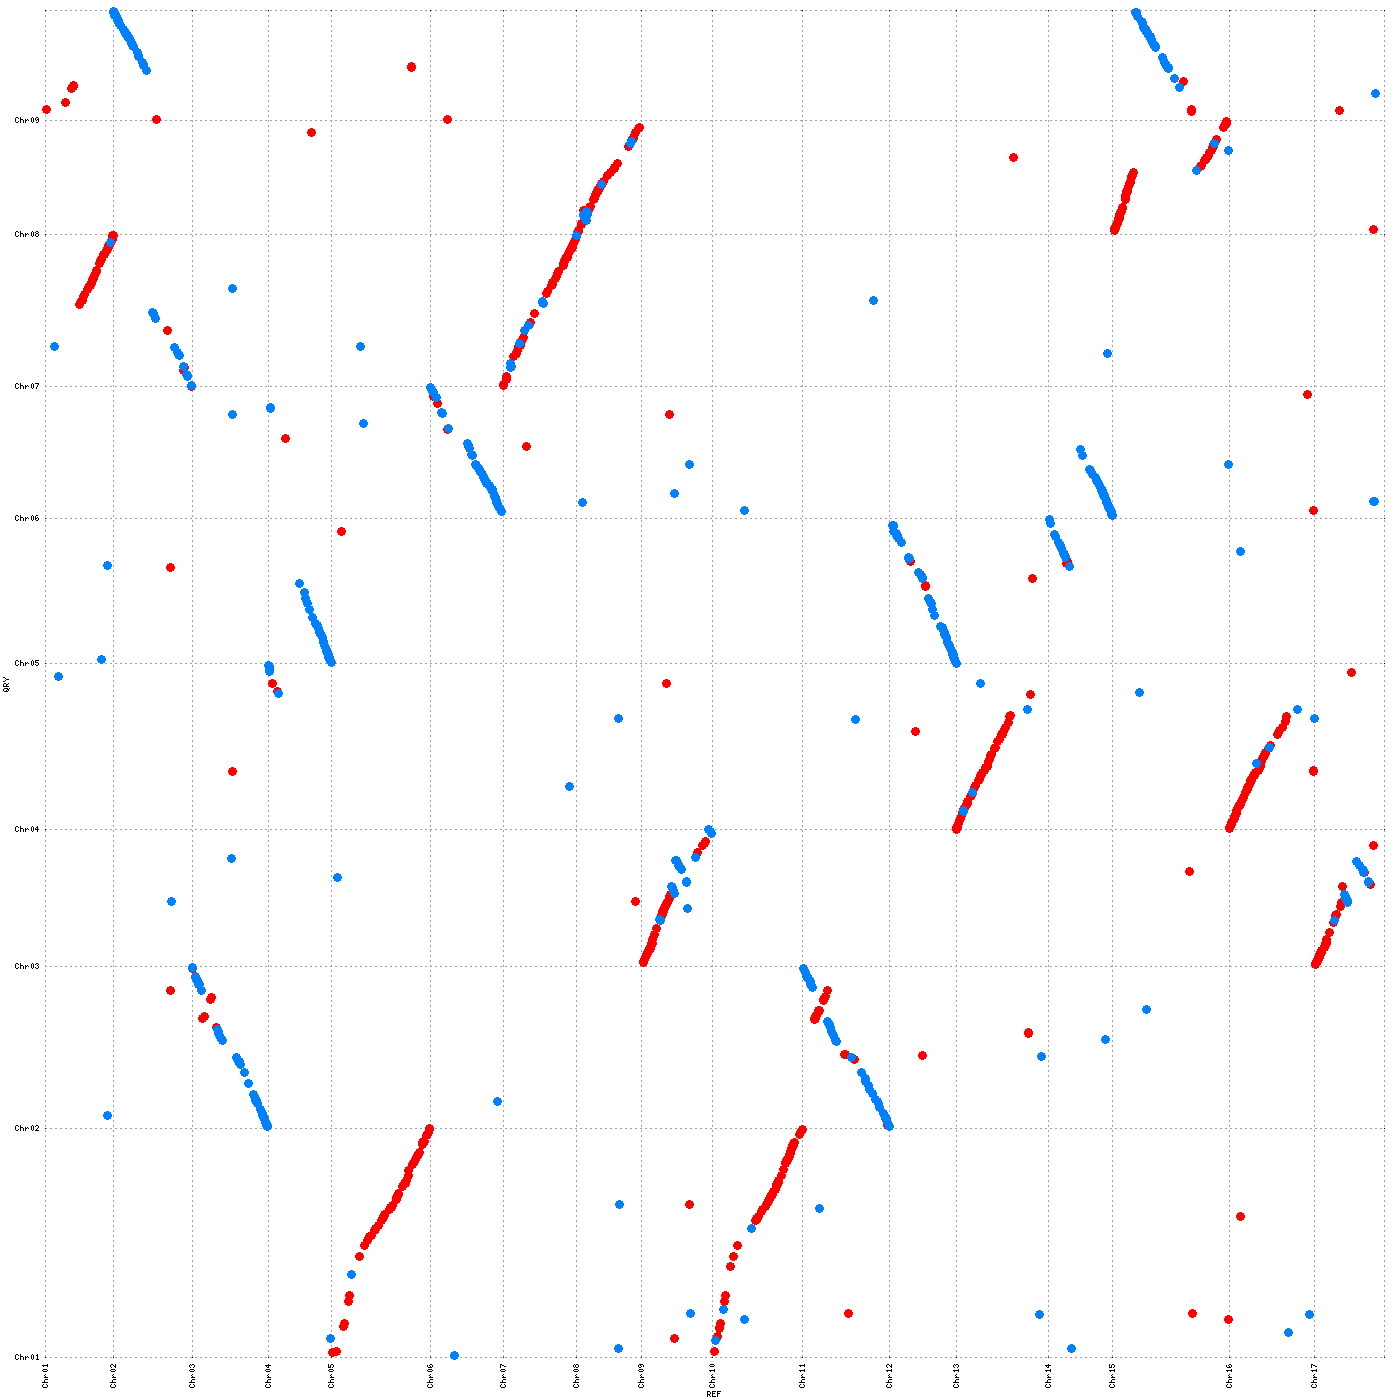

In [34]:
cat chr_apple.i70.l5k.graph.png | display

In [46]:
bsub -J graph \
-o show-coords_chr.apple.i70.l5k.out \
-e show-coords_chr.apple.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/show-coords \
-c \
-d \
-l \
-o \
-r \
-T \
chr_apple.i70.l5k.delta > show-coords_chr.apple.i70.l5k.txt"

Job <385108> is submitted to default queue <lowpriority>.
bash: -b: command not found
bash: or: command not found
bash: -B: command not found
bash: -c: command not found
bash: -d: command not found
bash: command substitution: line 7: syntax error near unexpected token `('
bash: command substitution: line 7: `            FRM columns (default for promer)'


: 1

### 3.2 pear

In [35]:
bsub -J nucmer \
-m aklppb38 \
-n 20 \
-o nucmer_chr.pear.out \
-e nucmer_chr.pear.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=chr_pear \
-t 20 \
$GENOME_PATH/$PEAR_ASSEMBLY $CHR_RENAMED"

Job <392428> is submitted to default queue <lowpriority>.


In [38]:
bsub -J filter \
-o filter_chr.pear.i70.l5k.out \
-e filter_chr.pear.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
chr_pear.delta > chr_pear.i70.l5k.delta"

Job <392668> is submitted to default queue <lowpriority>.


In [52]:
bsub -J graph \
-o graph_chr.pear.i70.l5k.out \
-e graph_chr.pear.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
chr_pear.i70.l5k.delta \
-R reference.pear.rids \
-Q query.rids \
--filter \
-p chr_pear.i70.l5k.graph"

Job <392690> is submitted to default queue <lowpriority>.


In [31]:
grep '>' $GENOME_PATH/$PEAR_ASSEMBLY

>Chr10
>Chr11
>Chr12
>Chr13
>Chr14
>Chr15
>Chr16
>Chr17
>Chr1
>Chr2
>Chr3
>Chr4
>Chr5
>Chr6
>Chr7
>Chr9
>Chr8
>SuperScaffold_49
>SuperScaffold_111
>SuperScaffold_243
>SuperScaffold_273
>SuperScaffold_290
>SuperScaffold_420
>SuperScaffold_436
>SuperScaffold_505
>SuperScaffold_520
>SuperScaffold_553
>SuperScaffold_555
>SuperScaffold_581
>tig00012527_4311101_to_5153684
>tig00012609 quiver pilon_obj
>tig00000810 quiver pilon_obj
>tig00000394 quiver pilon_obj
>tig00001427 quiver pilon_obj
>tig00002599 quiver pilon_obj
>tig00002749 quiver pilon_obj
>tig00012611 quiver pilon_obj
>tig00012641 quiver pilon_obj
>tig00012433 quiver pilon_obj
>tig00001310 quiver pilon_obj
>tig00012463 quiver pilon_obj
>tig00012549 quiver pilon_obj
>tig00012457 quiver pilon_obj
>tig00012638 quiver pilon_obj
>tig00002985 quiver pilon_obj
>tig00002559 quiver pilon_obj
>tig00012627 quiver pilon_obj
>tig00002789 quiver pilon_obj
>tig00012582 quiver pilon_obj
>tig00001667 quiver pilon_obj
>tig00000076 quiver pilon_obj
>

In [43]:
$GENOME_PATH/$PEAR_ASSEMBLY

bash: /output/genomic/plant/Gillenia/trifoliata/Synteny/PyrusCommunis_BartlettDHv2.0.fasta: Permission denied


: 126

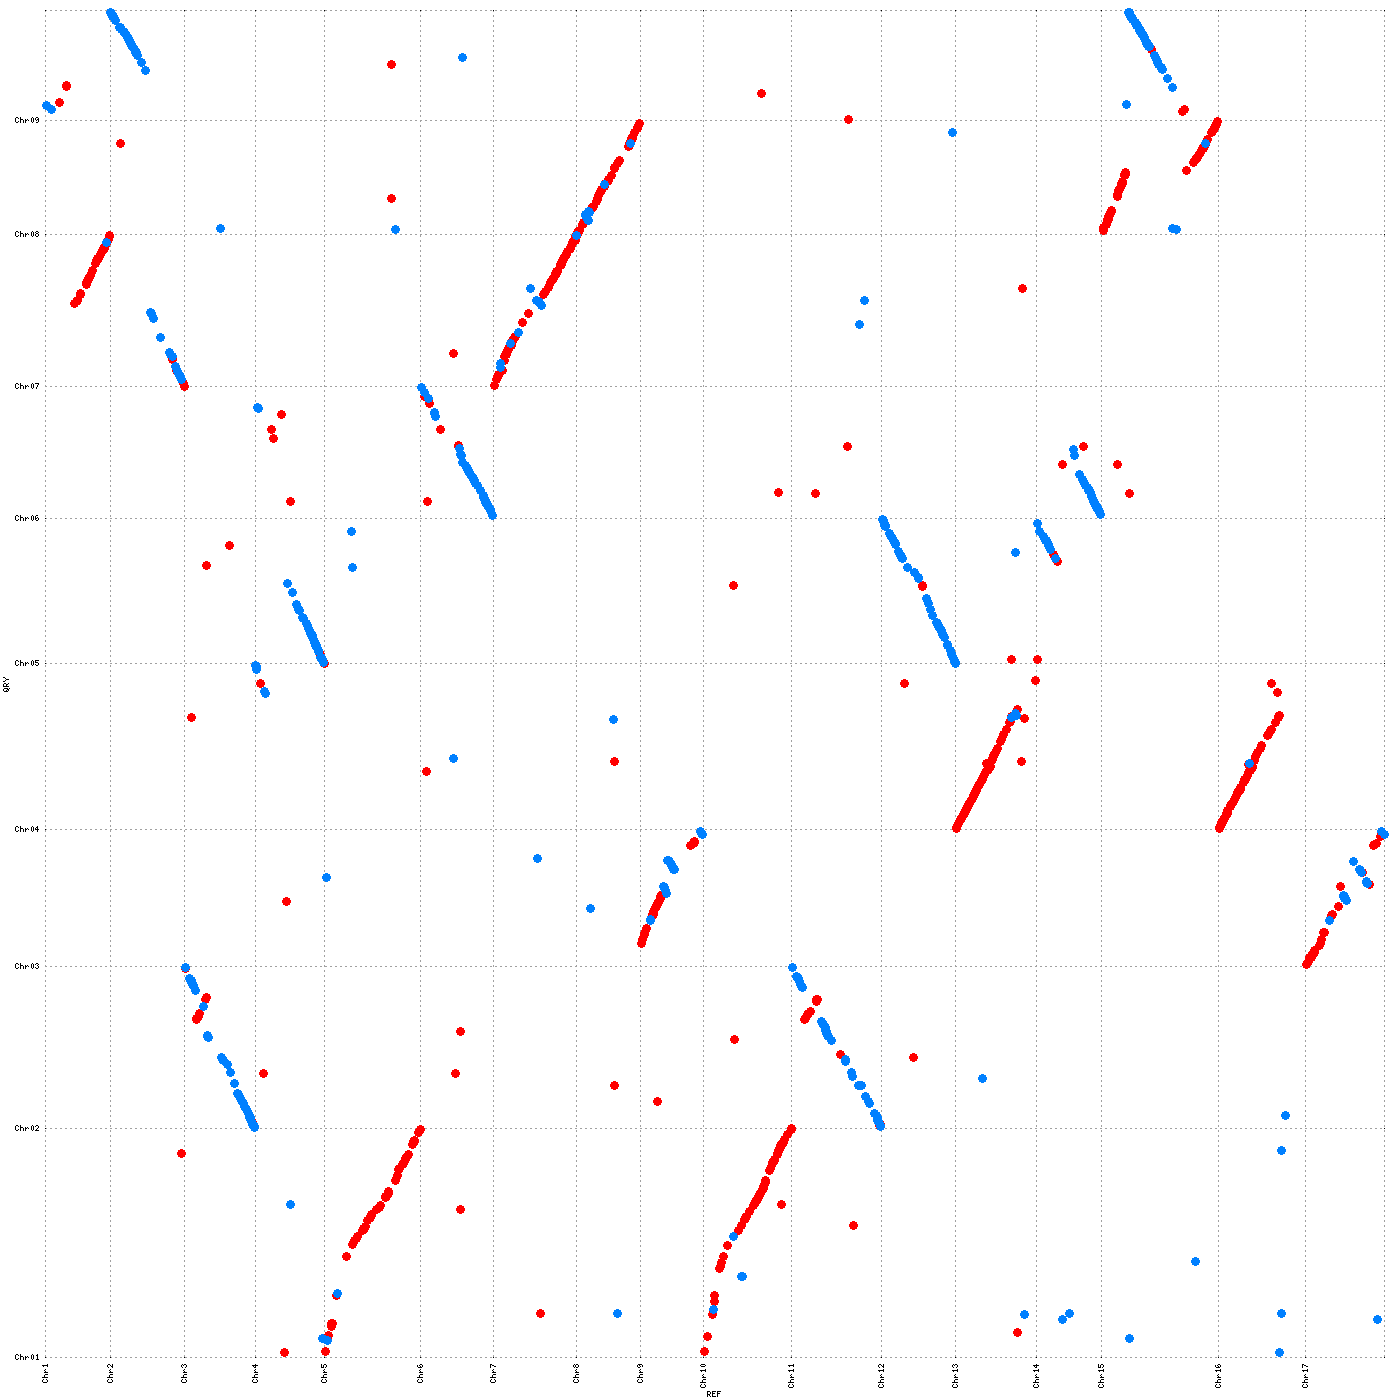

In [53]:
cat chr_pear.i70.l5k.graph.png | display

In [47]:
bsub -J graph \
-o show-coords_chr.pear.i70.l5k.out \
-e show-coords_chr.pear.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/show-coords \
-c \
-d \
-l \
-o \
-r \
-T \
chr_pear.i70.l5k.delta > show-coords_chr.pear.i70.l5k.txt"

Job <385109> is submitted to default queue <lowpriority>.


### 3.3 peach

In [36]:
bsub -J nucmer \
-m aklppb38 \
-n 20 \
-o nucmer_chr.peach.out \
-e nucmer_chr.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=chr_peach \
-t 20 \
$GENOME_PATH/$PEACH_ASSEMBLY $CHR_RENAMED"

Job <392429> is submitted to default queue <lowpriority>.


In [39]:
bsub -J filter \
-o filter_chr.peach.i70.l2k.out \
-e filter_chr.peach.i70.l2k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 2000 \
-m \
chr_peach.delta > chr_peach.i70.l2k.delta"

Job <392669> is submitted to default queue <lowpriority>.


In [42]:
bsub -J filter \
-o filter_chr.peach.i70.l1k.out \
-e filter_chr.peach.i70.l1k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 1000 \
-m \
chr_peach.delta > chr_peach.i70.l1k.delta"

Job <392672> is submitted to default queue <lowpriority>.


In [51]:
bsub -J graph \
-o graph_chr.peach.i70.l1k.out \
-e graph_chr.peach.i70.l1k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
chr_peach.i70.l1k.delta \
-R reference.peach.rids \
-Q query.rids \
--filter \
-p chr_peach.i70.l1k.graph"

Job <392689> is submitted to default queue <lowpriority>.


In [44]:
$GENOME_PATH/$PEACH_ASSEMBLY

bash: /output/genomic/plant/Gillenia/trifoliata/Synteny/Prunus_persica_v2.0.a1_scaffolds.fasta: Permission denied


: 126

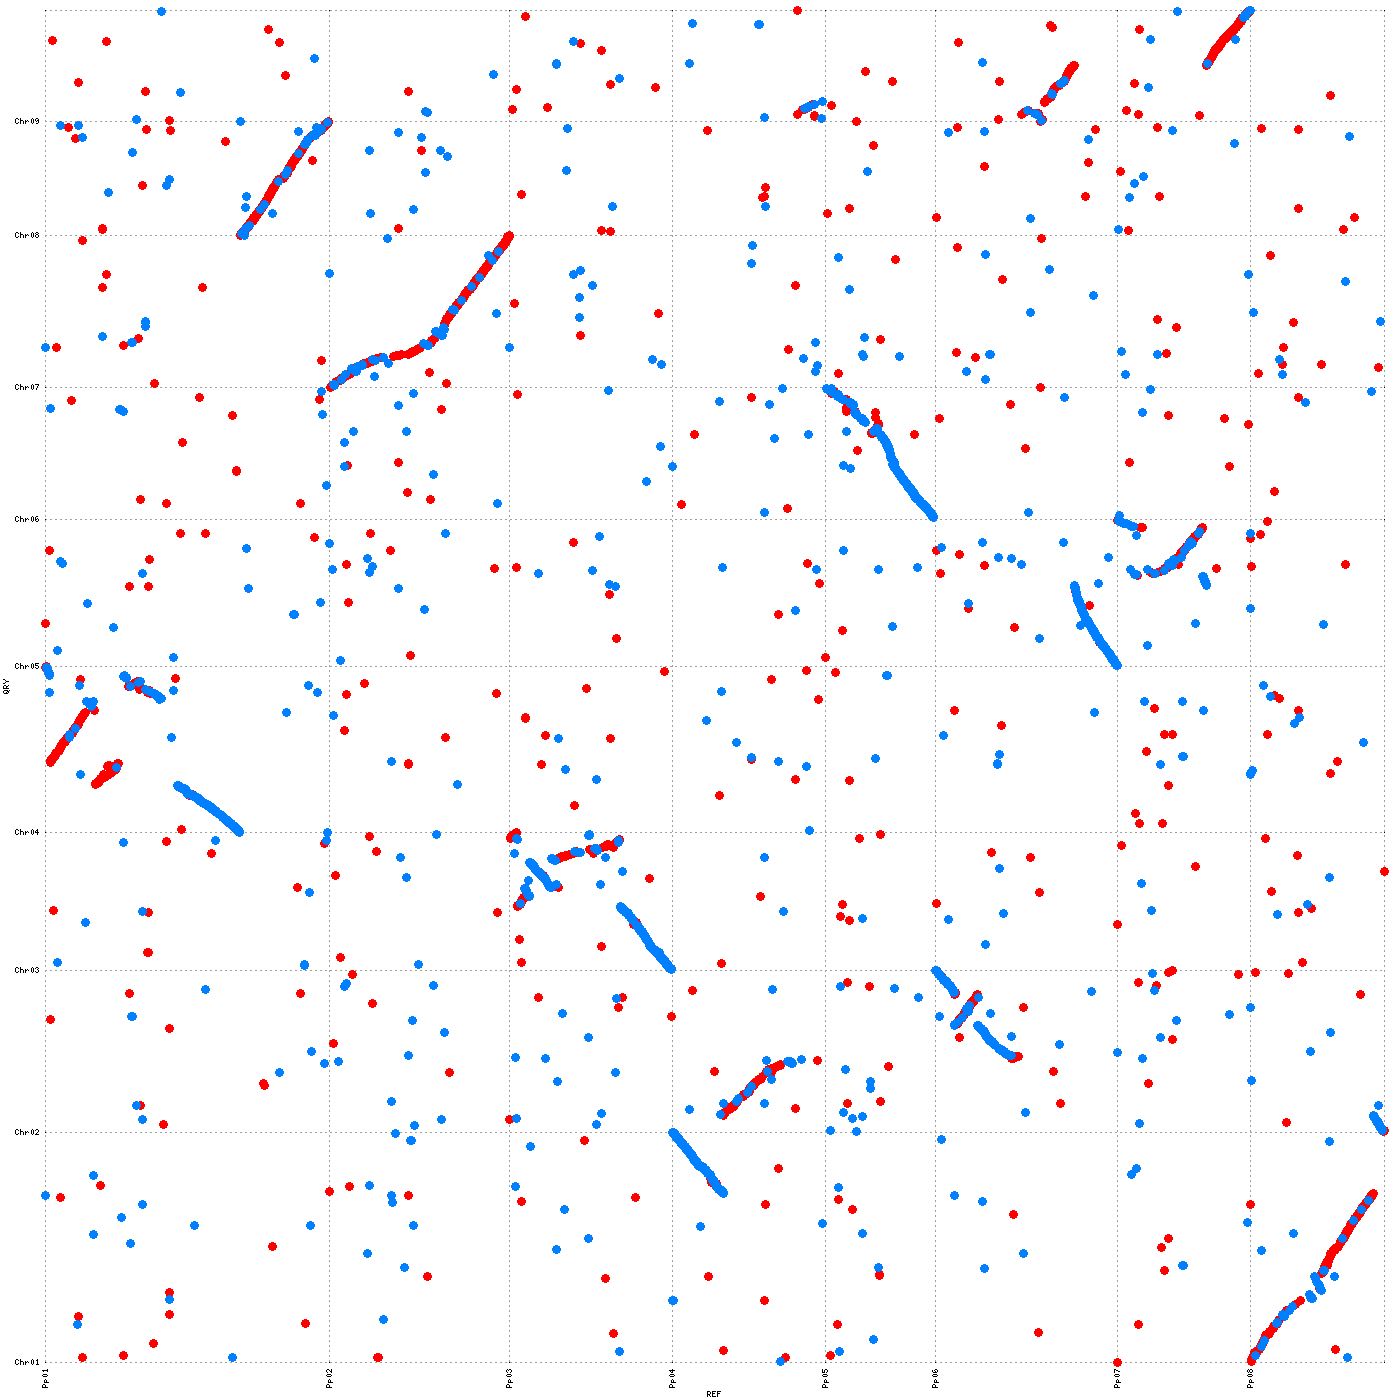

In [54]:
cat chr_peach.i70.l1k.graph.png | display

In [51]:
bsub -J graph \
-o show-coords_chr.peach.i70.l1k.out \
-e show-coords_chr.peach.i70.l1k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/show-coords \
-c \
-d \
-l \
-o \
-r \
-T \
chr_peach.i70.l1k.delta > show-coords_chr.peach.i70.l1k.txt"

Job <385113> is submitted to default queue <lowpriority>.


In [50]:
bsub -J graph \
-o graph_chr.peach.i70.l2k.out \
-e graph_chr.peach.i70.l2k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
chr_peach.i70.l2k.delta \
-R reference.peach.rids \
-Q query.rids \
--filter \
-p chr_peach.i70.l2k.graph"

Job <392688> is submitted to default queue <lowpriority>.


In [40]:
grep '>' $GENOME_PATH/$PEACH_ASSEMBLY

>Pp01
>Pp02
>Pp03
>Pp04
>Pp05
>Pp06
>Pp07
>Pp08
>scaffold_12
>scaffold_15
>scaffold_13
>scaffold_16
>scaffold_18
>scaffold_19
>scaffold_20
>scaffold_21
>scaffold_23
>scaffold_24
>scaffold_26
>scaffold_32
>scaffold_28
>scaffold_40
>scaffold_30
>scaffold_38
>scaffold_34
>scaffold_33
>scaffold_35
>scaffold_37
>scaffold_39
>scaffold_101
>scaffold_42
>scaffold_58
>scaffold_57
>scaffold_199
>scaffold_51
>scaffold_295
>scaffold_69
>scaffold_53
>scaffold_54
>scaffold_62
>scaffold_55
>scaffold_61
>scaffold_60
>scaffold_67
>scaffold_68
>scaffold_73
>scaffold_66
>scaffold_78
>scaffold_70
>scaffold_104
>scaffold_72
>scaffold_71
>scaffold_77
>scaffold_196
>scaffold_80
>scaffold_84
>scaffold_297
>scaffold_92
>scaffold_90
>scaffold_135
>scaffold_129
>scaffold_121
>scaffold_97
>scaffold_136
>scaffold_144
>scaffold_260
>scaffold_111
>scaffold_108
>scaffold_123
>scaffold_158
>scaffold_112
>scaffold_130
>scaffold_225
>scaffold_167
>scaffold_127
>scaffold_143
>scaffold_116
>scaffold_125
>scaffold_242
>sca

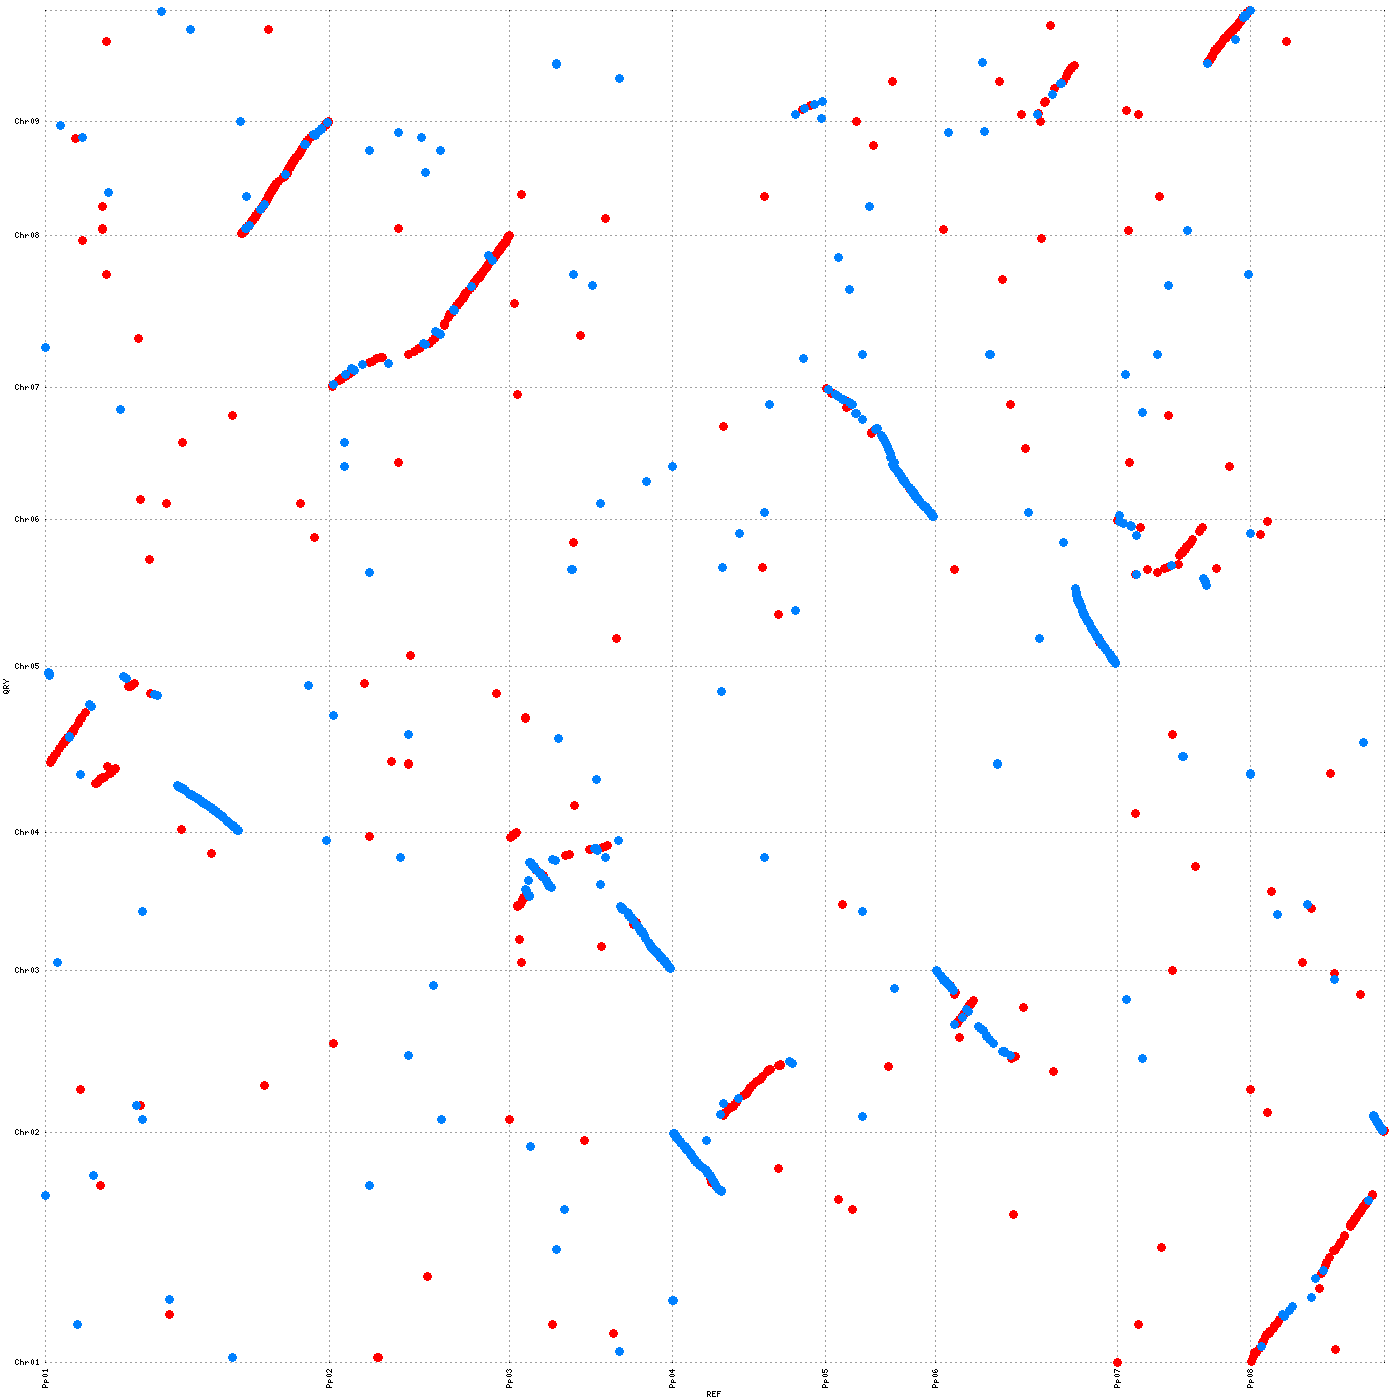

In [55]:
cat chr_peach.i70.l2k.graph.png | display

In [48]:
bsub -J graph \
-o show-coords_chr.peach.i70.l2k.out \
-e show-coords_chr.peach.i70.l2k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/show-coords \
-c \
-d \
-l \
-o \
-r \
-T \
chr_peach.i70.l2k.delta > show-coords_chr.peach.i70.l2k.txt"

Job <385110> is submitted to default queue <lowpriority>.


### 3.4 with raspberry

In [5]:
ls /output/genomic/plant/Rubus/occidentalis/Genome/Rubus_occidentalis_Braspberry_v3/

Rubus_occ_V3_10-12-17.fasta.gz	Rubus_occ_V3.proteins.fasta.gz
Rubus_occ_V3.all.gff		Rubus_occ_V3.transcripts.fasta.gz


In [6]:
gunzip -d -c $RASPBERRY_ASSEMBLY > Rubus_occ_V3_10-12-17.fasta

In [8]:
mv Rubus_occ_V3_10-12-17.fasta /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/synteny

In [9]:
cd 014.chr/official_chrs_revcomp/synteny

In [37]:
bsub -J nucmer \
-m aklppb38 \
-n 20 \
-o nucmer_chr.raspberry_clean.out \
-e nucmer_chr.raspberry_clean.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=chr_raspberry_clean \
-t 20 \
/workspace/hrachd/Raspberry/2020/Rubus_occ_V3_10-12-17.clean.fa $CHR_RENAMED"

Job <392430> is submitted to default queue <lowpriority>.


In [41]:
bsub -J filter \
-o filter_chr.raspberry_clean.i70.l1k.out \
-e filter_chr.raspberry_clean.i70.l1k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 1000 \
-m \
chr_raspberry_clean.delta > chr_raspberry_clean.i70.l1k.delta"

Job <392671> is submitted to default queue <lowpriority>.


In [64]:
bsub -J graph \
-o graph_chr.raspberry.i70.l2k.out \
-e graph_chr.raspberry.i70.l2k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
chr_raspberry_clean.i70.l2k.delta \
-R reference.raspberry.rids \
-Q query.rids \
--filter \
-p chr_raspberry_clean.i70.l2k.graph"

Job <392696> is submitted to default queue <lowpriority>.


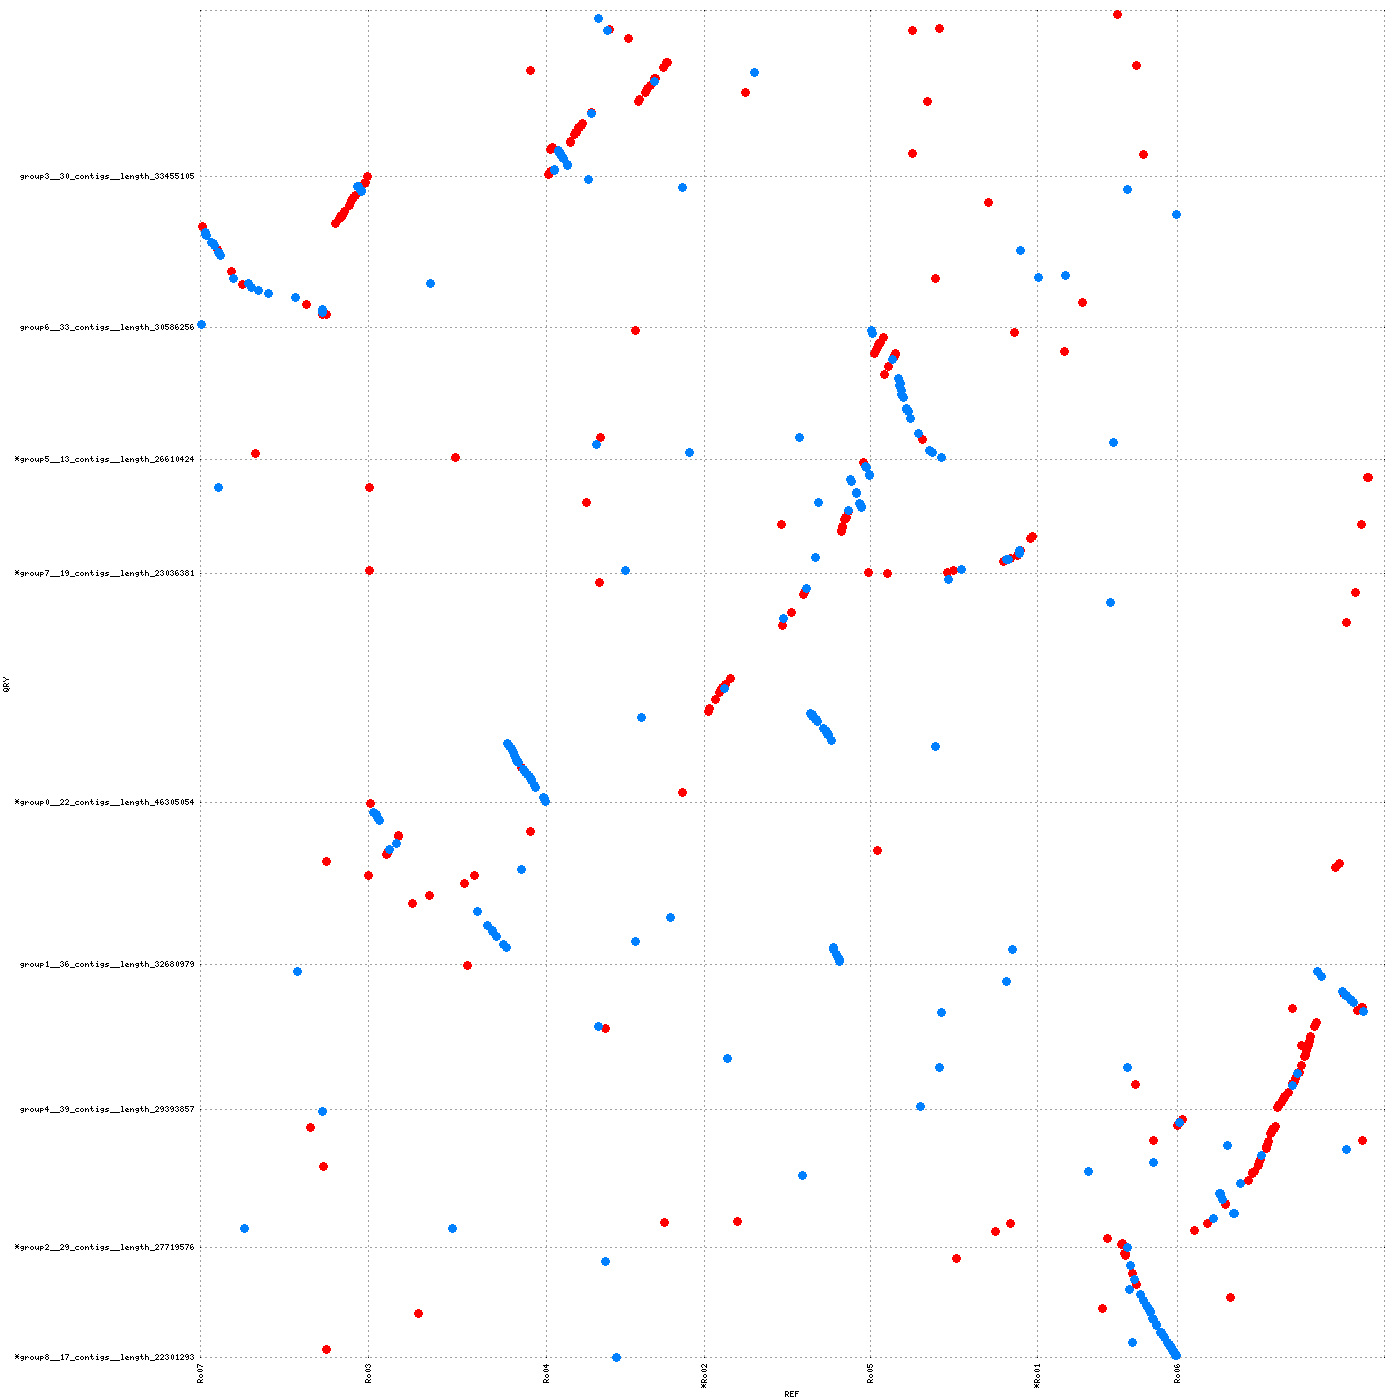

In [61]:
cat chr_raspberry_clean.i70.l2k.graph.png | display

In [50]:
bsub -J graph \
-o show-coords_chr.raspberry.i70.l2k.out \
-e show-coords_chr.raspberry.i70.l2k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/show-coords \
-c \
-d \
-l \
-o \
-r \
-T \
chr_raspberry.i70.l2k.delta > show-coords_chr.raspberry.i70.l2k.txt"

Job <385112> is submitted to default queue <lowpriority>.


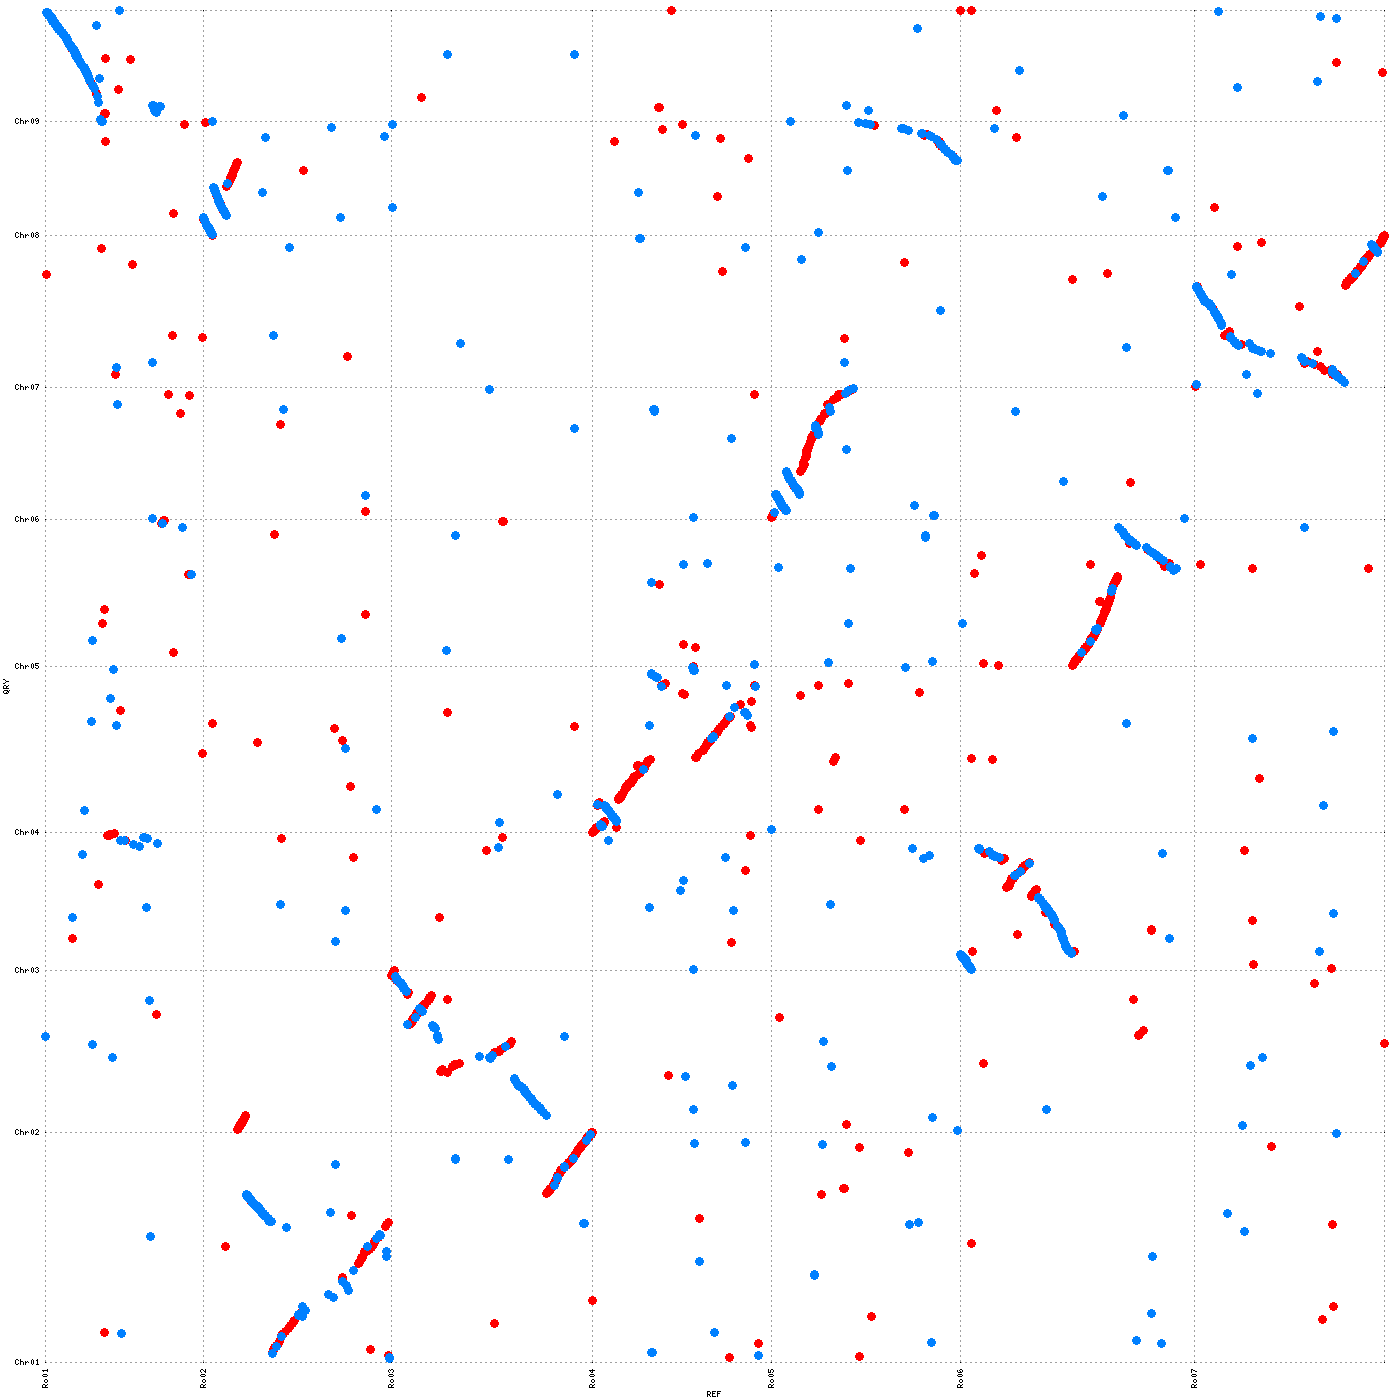

In [63]:
cat chr_raspberry_clean.i70.l1k.graph.png | display

In [49]:
bsub -J graph \
-o show-coords_chr.raspberry.i70.l1k.out \
-e show-coords_chr.raspberry.i70.l1k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/show-coords \
-c \
-d \
-l \
-o \
-r \
-T \
chr_raspberry.i70.l1k.delta > show-coords_chr.raspberry.i70.l1k.txt"

Job <385111> is submitted to default queue <lowpriority>.


## 4. HiC contact map generation

### 4.1 trying pretextmap

In [31]:
pwd

/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/synteny
(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [32]:
cd ..
mkdir pretextmap
cd pretextmap

(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) (/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) (/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [29]:
module unload pfr-python3/3.6.1
module load conda

(base) 

: 1

In [30]:
conda activate /workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap

(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [33]:
HICR1_RAW=/workspace/hraczw/github/GA/Gillenia_genome/002.Fastp.trimming/R1.cleaned.specifiedAdapter.short.Q15.fq.gz
HICR2_RAW=/workspace/hraczw/github/GA/Gillenia_genome/002.Fastp.trimming/R2.cleaned.specifiedAdapter.short.Q15.fq.gz

(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) (/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [35]:
module load bwa
module list

(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) Currently Loaded Modulefiles:
  1) powerPlant/core     5) bamtools/2.4.0      9) ncbi-blast/2.2.30
  2) perlbrew/0.76       6) augustus/3.2.2     10) BUSCO/v3.0.2
  3) perl/bio-extras     7) emboss/6.5.7       11) conda/4.8.2
  4) boost/1_61_0        8) hmmer/3.1b2        12) bwa/0.7.17
(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [36]:
bsub -J bwa \
-o bwa_index.out \
-e bwa_index.err \
"bwa index /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/gillenia_9chrs_official.fasta"

Job <312207> is submitted to default queue <lowpriority>.
(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [37]:
bsub -J map \
-n 40 \
-o bwa_map.out \
-e bwa_map.err \
"bwa mem \
-t 40 \
/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/gillenia_9chrs_official.fasta \
$HICR1_RAW \
$HICR2_RAW | PretextMap \
-o gillenia_9chrs.pretext"

Job <312842> is submitted to default queue <lowpriority>.
(/workspace/hraczw/github/programs/pretextmap/hraczw_pretextmap) 

: 1

In [39]:
conda deactivate

(base) 

: 1

In [40]:
module unload conda

### 4.2 using juicerbox

* generating a .hic file for visualisation
 * fasta to gpa file
 * HiC mapping bam file
 * from gpa to .assembly file

In [ ]:
bsub -J map \
-n 40 \
-o bwa_map.out \
-e bwa_map.err \
"bwa mem \
-t 40 \
/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/gillenia_9chrs_official.fasta \
$HICR1_RAW \
$HICR2_RAW | PretextMap \
-o gillenia_9chrs.pretext"

### 5. put together with unanchored seqs

In [9]:
# extract unanchored seqs based on unanchored IDs

RAGOO_SCAFF_REV=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta

In [3]:
module load ncbi-blast
module list

Currently Loaded Modulefiles:
  1) powerPlant/core    4) git/2.21.0         7) asub/2.1
  2) texlive/20151117   5) perlbrew/0.76      8) ncbi-blast/2.6.0
  3) pandoc/1.19.2      6) perl/5.28.0


In [2]:
cd /workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/

In [5]:
head unanchoredIDs.txt

contig_1689_RaGOO
contig_7_RaGOO
contig_12_RaGOO
contig_325_RaGOO
contig_156_RaGOO
contig_952_RaGOO
contig_223_RaGOO
contig_2218_RaGOO
contig_111_RaGOO
contig_506_RaGOO


In [8]:
makeblastdb -h

USAGE
  makeblastdb [-h] [-help] [-in input_file] [-input_type type]
    -dbtype molecule_type [-title database_title] [-parse_seqids]
    [-hash_index] [-mask_data mask_data_files] [-mask_id mask_algo_ids]
    [-mask_desc mask_algo_descriptions] [-gi_mask]
    [-gi_mask_name gi_based_mask_names] [-out database_name]
    [-max_file_sz number_of_bytes] [-logfile File_Name] [-taxid TaxID]
    [-taxid_map TaxIDMapFile] [-version]

DESCRIPTION
   Application to create BLAST databases, version 2.6.0+

Use '-help' to print detailed descriptions of command line arguments


In [10]:
makeblastdb -in $RAGOO_SCAFF_REV -dbtype nucl -parse_seqids -out scaff_ragoo_gapfilled_noContamination.revcomp.rename



Building a new DB, current time: 09/28/2020 10:17:32
New DB name:   /powerplant/workspace/hraczw/github/GA/Gillenia_genome/014.chr/official_chrs_revcomp/scaff_ragoo_gapfilled_noContamination.revcomp.rename
New DB title:  /workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 1524 sequences in 4.37611 seconds.


In [13]:
blastdbcmd -db scaff_ragoo_gapfilled_noContamination.revcomp.rename -dbtype nucl -entry_batch unanchoredIDs.txt -out unanchoredSeqs.fasta

In [14]:
head unanchoredSeqs.fasta

>contig_1689_RaGOO 
AGGGCTTCAGTTCAAAATGAGCTTTGATATTCAAAGAGTGCTACTAAGACCACTATTTGACTCTATTTTCCCATCCAATT
TATAAGTGTATTTGTCATGAATATAGTAGACAACAAGATTAAAAGTACATTCAATGTTTATTTACAATTTATTTAATATG
CATATGTCGTTTTATTTAATAATTTGTAACTGGCTCAATTTACAGATGACCTCGTTGAAGGCAGAAGTTGAAGACCTGAA
GCAAAAGCTCGCGTCTCAGGAAAGCCGGATGACCCAAATCTTACACGCCCTCCAATTGTCCAGCATTCCATTGAATATGC
CATCATCCGATTCCCAGCCCCCTCACTAGTTACTTCGTTTTAGGATTATTTGATTTTATTATTGAATATTTTCTTCGTAT
ATTTCTTTATATAATATAATTTGTTTTTCTACATTGTTTATTATATTTTATTGTCTTTTAAATACCAATTAATTAAATAT
ATATATAAAATATAAAATATATAAAATATAAAAATATAAAAAAATTAAAAATTAAATATTTTGAGCGACGAAATATTTCG
TCACTTAAAGTCTAACAATAACTTAGGCGACGAAATAATTTCATCGCCAAAAATAGTCGCGCGATTGTGAATTGGGCGAC
GAACGTATTTCCTTCGTCACCCAAATGTTTGGTCGACGGACTTTGAGCGGCGAATTTTGGGCGACGAATTATTGGTCGCC


In [25]:
python << EOF

f = open("concatenatedUnanchoredSeqs.fasta",'w')
seqs = []

with open("unanchoredSeqs.fasta") as fasta:
    prev_seq = []
    for line in fasta:
        if line.startswith(">"):
            seqs.append("".join(prev_seq))
            prev_seq = []
        else:
            prev_seq.append(line.rstrip())

# This appends the lines after the last ">"
seqs.append("".join(prev_seq))

f.write(">Chr00\n")
string = "NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN".join(seqs)
string_remove_firstGap = string[100:]
f.write(string_remove_firstGap)

EOF

In [34]:
module load BBMap/38.33

In [38]:
reformat.sh in=concatenatedUnanchoredSeqs.fasta out=concatenatedUnanchoredSeqs_multilines.fasta fastawrap=80

java -ea -Xmx200m -cp /software/bioinformatics/BBMap-38.33/current/ jgi.ReformatReads in=concatenatedUnanchoredSeqs.fasta out=concatenatedUnanchoredSeqs_multilines.fasta fastawrap=80
Executing jgi.ReformatReads [in=concatenatedUnanchoredSeqs.fasta, out=concatenatedUnanchoredSeqs_multilines.fasta, fastawrap=80]

Input is being processed as unpaired
Input:                  	1 reads          	24555086 bases
Output:                 	1 reads (100.00%) 	24555086 bases (100.00%)

Time:                         	1.340 seconds.
Reads Processed:           1 	0.00k reads/sec
Bases Processed:      24555k 	18.32m bases/sec


In [39]:
head concatenatedUnanchoredSeqs_multilines.fasta

>Chr00
AGGGCTTCAGTTCAAAATGAGCTTTGATATTCAAAGAGTGCTACTAAGACCACTATTTGACTCTATTTTCCCATCCAATT
TATAAGTGTATTTGTCATGAATATAGTAGACAACAAGATTAAAAGTACATTCAATGTTTATTTACAATTTATTTAATATG
CATATGTCGTTTTATTTAATAATTTGTAACTGGCTCAATTTACAGATGACCTCGTTGAAGGCAGAAGTTGAAGACCTGAA
GCAAAAGCTCGCGTCTCAGGAAAGCCGGATGACCCAAATCTTACACGCCCTCCAATTGTCCAGCATTCCATTGAATATGC
CATCATCCGATTCCCAGCCCCCTCACTAGTTACTTCGTTTTAGGATTATTTGATTTTATTATTGAATATTTTCTTCGTAT
ATTTCTTTATATAATATAATTTGTTTTTCTACATTGTTTATTATATTTTATTGTCTTTTAAATACCAATTAATTAAATAT
ATATATAAAATATAAAATATATAAAATATAAAAATATAAAAAAATTAAAAATTAAATATTTTGAGCGACGAAATATTTCG
TCACTTAAAGTCTAACAATAACTTAGGCGACGAAATAATTTCATCGCCAAAAATAGTCGCGCGATTGTGAATTGGGCGAC
GAACGTATTTCCTTCGTCACCCAAATGTTTGGTCGACGGACTTTGAGCGGCGAATTTTGGGCGACGAATTATTGGTCGCC
